## Dataset List: 

1. PhysioNet 2021 Challenge

```
    Data Sources: 
    
    CPSC Database and CPSC-Extra Database
    INCART Database
    PTB and PTB-XL Database
    The Georgia 12-lead ECG Challenge (G12EC) Database
    Augmented Undisclosed Database
    Chapman-Shaoxing and Ningbo Database
    The University of Michigan (UMich) Database
```

## PhysioNet 2021 Challenge

The training data contains twelve-lead ECGs. The validation and test data contains twelve-lead, six-lead, four-lead, three-lead, and two-lead ECGs:

1. Twelve leads: I, II, III, aVR, aVL, aVF, V1, V2, V3, V4, V5, V6
2. Six leads: I, II, III, aVR, aVL, aVF
3. Four leads: I, II, III, V2
4. Three leads: I, II, V2
5. Two leads: I, II

Each ECG recording has one or more labels that describe cardiac abnormalities (and/or a normal sinus rhythm).

The Challenge data include annotated twelve-lead ECG recordings from six sources in four countries across three continents. These databases include over 100,000 twelve-lead ECG recordings with over 88,000 ECGs shared publicly as training data.

For example, a header file A0001.hea may have the following contents:

```
    A0001 12 500 7500
    A0001.mat 16+24 1000/mV 16 0 28 -1716 0 I
    A0001.mat 16+24 1000/mV 16 0 7 2029 0 II
    A0001.mat 16+24 1000/mV 16 0 -21 3745 0 III
    A0001.mat 16+24 1000/mV 16 0 -17 3680 0 aVR
    A0001.mat 16+24 1000/mV 16 0 24 -2664 0 aVL
    A0001.mat 16+24 1000/mV 16 0 -7 -1499 0 aVF
    A0001.mat 16+24 1000/mV 16 0 -290 390 0 V1
    A0001.mat 16+24 1000/mV 16 0 -204 157 0 V2
    A0001.mat 16+24 1000/mV 16 0 -96 -2555 0 V3
    A0001.mat 16+24 1000/mV 16 0 -112 49 0 V4
    A0001.mat 16+24 1000/mV 16 0 -596 -321 0 V5
    A0001.mat 16+24 1000/mV 16 0 -16 -3112 0 V6
    #Age: 74
    #Sex: Male
    #Dx: 426783006
    #Rx: Unknown
    #Hx: Unknown
    #Sx: Unknown
```

From the first line of the file:
- We see that the recording number is A0001, and the recording file is A0001.mat. 
- The recording has 12 leads, each recorded at a 500 Hz sampling frequency, and contains 7500 samples. 
- From the next 12 lines of the file (one for each lead), we see that each signal:
    - Was written at 16 bits with an offset of 24 bits
    - The floating point number (analog-to-digital converter (ADC) units per physical unit) is 1000/mV 
    - The resolution of the analog-to-digital converter (ADC) used to digitize the signal is 16 bits, and the baseline value corresponding to 0 physical units is 0. 
    - The first value of the signal (-1716, etc.), the checksum (0, etc.), and the lead name (I, etc.) are the last three entries of each of these lines. 
- From the final 6 lines, we see that the patient is:
    - A 74-year-old male 
    - With a diagnosis (Dx) of 426783006, which is the **SNOMED-CT code** for sinus rhythm. 
    - The medical prescription (Rx), history (Hx), and symptom or surgery (Sx) are unknown. 

- Please visit WFDB header format for more information on the header file and variables.

## Data Source Information

1. CPSC Database and CPSC-Extra Database

- Together, these databases contain 13,256 ECGs (10,330 ECGs shared as training data, 1,463 retained as validation data, and 1,463 retained as test data).
- Each recording is between 6 and 144 seconds long with a sampling frequency of 500 Hz.
- Per HIPAA guidelines ages over 89 are not provided for these datasets herein.
- cpsc_2018, 6,877 recordings
- cpsc_2018_extra, 3,453 recordings

2. INCART (st_petersburg_incart) Database

- This source contains 74 annotated ECGs (all shared as training data) extracted from 32 Holter monitor recordings. 
- Each recording is 30 minutes long with a sampling frequency of 257 Hz.

3. PTB and PTB-XL Database

- The source contains 22,353 ECGs (all shared as training data). 
- Each recording is between 10 and 120 seconds long with a sampling frequency of either 500 or 1,000 Hz.
- PTB, 516 recordings
- PTB-XL, 21,837 recordings

4. Georgia 12-lead ECG Challenge (G12EC) Database

- This source contains 20,672 ECGs (10,344 ECGs shared as training data, 5,167 retained as validation data, and 5,161 retained as test data). 
- Each recording is between 5 and 10 seconds long with a sampling frequency of 500 Hz.

5. Shaoxing People’s Hospital (Chapman-Shaoxing) and Ningbo First Hospital (Ningbo) Database  

- This source contains 45,152 ECGS (all shared as training data). 
- Each recording is 10 seconds long with a sampling frequency of 500 Hz
- chapman-shaoxing, 10,247 recordings
- ningbo, 34,905 recordings

NOTE: Under each dataset folder the files are grouped into subfolders with up to 1000 records per subfolder. These subfolders are named as g# where the # starts at 1. Once 1000 records are allocated to a folder a new folder is started with the # incremented by one.  

## Data Exploration & Examples

In [ ]:
pip install wfdb

In [6]:
# General imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import sys

# Matlab/WFDB files
import scipy.io as sio
import wfdb

In [7]:
os.listdir('C:/Users/navme/Desktop/ECG_Project/PyFiles')

['helper_functions.py', 'helper_function_tests.py', '__init__.py']

In [8]:
sys.path.append('C:/Users/navme/Desktop/ECG_Project/PyFiles')

In [10]:
# Import helper functions
import helper_functions as hf
import helper_function_tests as hft

In [11]:
PhysioNet_PATH = f'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training'
PhysioNet_PATH

'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training'

In [12]:
os.listdir(PhysioNet_PATH)

['chapman_shaoxing',
 'cpsc_2018',
 'cpsc_2018_extra',
 'georgia',
 'index.html',
 'ningbo',
 'ptb',
 'ptb-xl',
 'st_petersburg_incart']

In [13]:
# Get all the file paths in the PhysioNet directory
physionet_file_PATHS = []

In [14]:
for file in os.listdir(PhysioNet_PATH):
    file_path = os.path.join(PhysioNet_PATH, file)
    file_path = file_path.replace('\\', '/')
    physionet_file_PATHS.append(file_path)

In [15]:
physionet_file_PATHS

['C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018_extra',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/georgia',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/index.html',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ningbo',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ptb',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challen

In [16]:
print(os.listdir(physionet_file_PATHS[1]))
print(physionet_file_PATHS[1])

['g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'index.html']
C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018


In [17]:
physionet_file_PATHS = [path for path in physionet_file_PATHS if "index.html" not in path]
physionet_file_PATHS

['C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018_extra',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/georgia',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ningbo',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ptb',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ptb-xl',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2

In [18]:
physionet_file_PATHS

['C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018_extra',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/georgia',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ningbo',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ptb',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ptb-xl',
 'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2

In [19]:
validation_datasets = ['ptb', 'ptb-xl']

for file in os.listdir(PhysioNet_PATH):
    file_path = os.path.join(PhysioNet_PATH, file)
    file_path = file_path.replace('\\', '/')
    if file not in validation_datasets:
        print(file_path)

C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing
C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018
C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/cpsc_2018_extra
C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/georgia
C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/index.html
C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/ningbo
C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/st_petersburg_incart


Let's check an example of what the g1 folder of chapman_shaoxing database looks like: 

In [20]:
chapman_shaoxing_g1 = os.path.join(physionet_file_PATHS[0], os.listdir(physionet_file_PATHS[0])[0])
chapman_shaoxing_g1 = chapman_shaoxing_g1.replace('\\', '/')
chapman_shaoxing_g1

'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1'

In [21]:
chapman_shaoxing_g1_hea = []
chapman_shaoxing_g1_mat = []

for file in os.listdir(chapman_shaoxing_g1): 
    if file.endswith('.hea'):
        chapman_shaoxing_g1_hea.append(file)
    elif file.endswith('.mat'):
        chapman_shaoxing_g1_mat.append(file)

len(chapman_shaoxing_g1_hea), len(chapman_shaoxing_g1_mat), len(os.listdir(chapman_shaoxing_g1))  # len(os.listdir(chapman_shaoxing_g1) contains RECORDS and index.html

(999, 999, 2000)

In [22]:
os.listdir(physionet_file_PATHS[0])

['g1',
 'g10',
 'g11',
 'g2',
 'g3',
 'g4',
 'g5',
 'g6',
 'g7',
 'g8',
 'g9',
 'index.html']

In [23]:
test_data_path_hea = []
test_data_path_mat = []
test_data_indices = []

In [24]:
for path in physionet_file_PATHS:
    for sub_folder in os.listdir(path):
        sub_folder_path = os.path.join(path, sub_folder)
        sub_folder_path = sub_folder_path.replace('\\', '/')
        if sub_folder.endswith('index.html'):
            test_data_indices.append(sub_folder_path)
        else:
            if os.path.isdir(sub_folder_path):
                for file in os.listdir(sub_folder_path):
                    if file.endswith('.hea'):
                        file_path = os.path.join(sub_folder_path, file)
                        file_path = file_path.replace('\\', '/')
                        test_data_path_hea.append(file_path)
                    elif file.endswith('.mat'):
                        file_path = os.path.join(sub_folder_path, file)
                        file_path = file_path.replace('\\', '/')
                        test_data_path_mat.append(file_path)

In [25]:
len(test_data_path_hea), len(test_data_path_mat), len(test_data_indices)

(88252, 88241, 8)

In [26]:
hea_file_path = test_data_path_hea[10]

with open(hea_file_path, 'r') as f:
    contents = f.read()

print(contents)

JS00012 12 500 5000
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -39 32136 0 I
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -68 -29659 0 II
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -29 3700 0 III
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 54 -27826 0 aVR
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -5 8153 0 aVL
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -49 13678 0 aVF
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 142 8912 0 V1
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 15 -30417 0 V2
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -137 -25772 0 V3
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -127 -22625 0 V4
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -127 6800 0 V5
JS00012.mat 16x1+24 1000.0(0)/mV 16 0 -59 -18225 0 V6
# Age: 77
# Sex: Male
# Dx: 427084000
# Rx: Unknown
# Hx: Unknown
# Sx: Unknown



In [27]:
hea_file_path

'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00012.hea'

In [102]:
test_data_path_mat[10]

'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00012.mat'

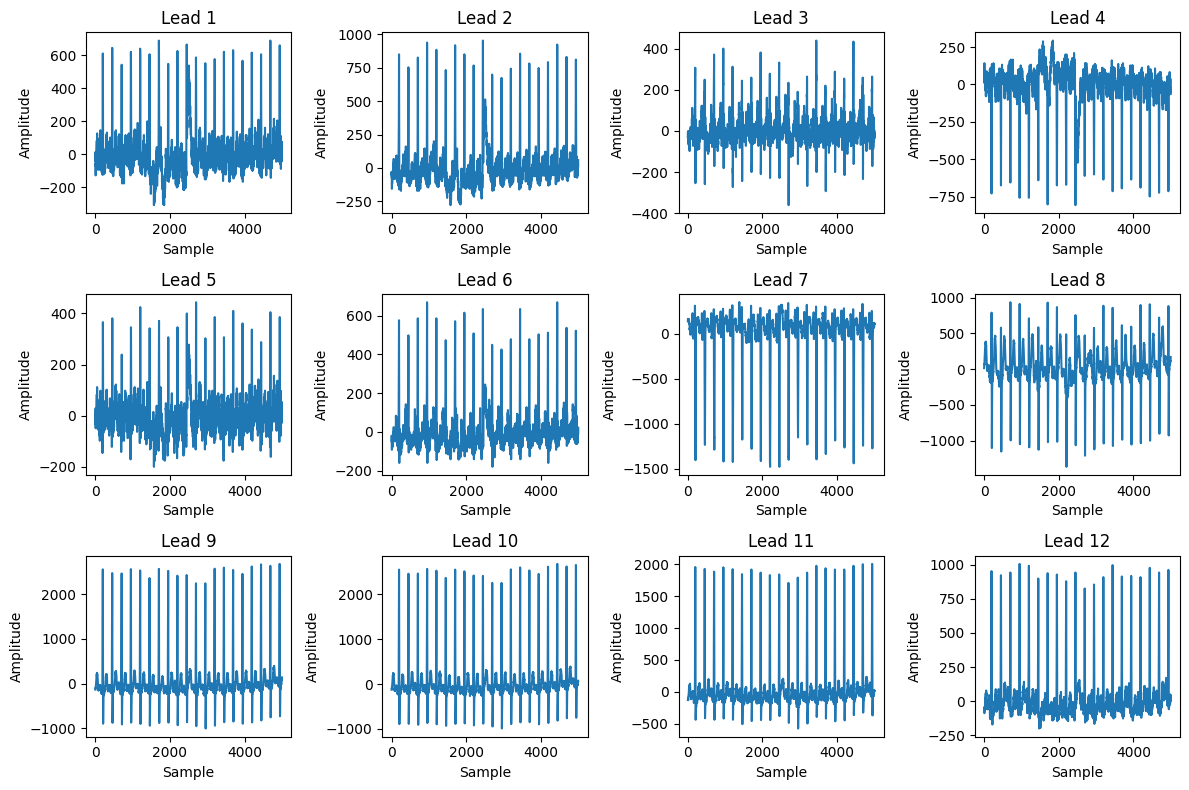

In [28]:
mat_file_path = test_data_path_mat[10]

data = sio.loadmat(mat_file_path)

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.plot(data['val'][i])
    ax.set_xlabel('Sample')
    ax.set_ylabel('Amplitude')
    ax.set_title(f'Lead {i+1}')

plt.tight_layout()
plt.show()

In [29]:
mat_file_path

'C:/Users/navme/Desktop/ECG_Thesis_Local/PhysioNet-2021-Challenge/physionet.org/files/challenge-2021/1.0.3/training/chapman_shaoxing/g1/JS00012.mat'

In [103]:
class PhysioNetDataset(torch.utils.data.Dataset):
    def __init__(self, dataset_path, train=False):
        self.dataset_path = dataset_path
        self.dataset_path = [path for path in self.dataset_path if "index.html" not in path]
        self.train = train
        self.file_list = os.listdir(dataset_path)
        self._hea_files = []
        self._mat_files = []
        self._indices_files = []
        self._hea_files_path = []
        self._mat_files_path = []

        self.file_PATHS = []  # Directory to main database folders
        self.data_files = []  # Directory to data files

        # Validation Case: PTB Databases only
        if self.train == False:
            validation_datasets = ['ptb', 'ptb-xl']
            for file in os.listdir(dataset_path):
                if file in validation_datasets:
                    file_path = os.path.join(dataset_path, file)
                    file_path = file_path.replace('\\', '/')
                    self.file_PATHS.append(file_path)

        # Training Case: All Databases excluding PTB
        else:
            validation_datasets = ['ptb', 'ptb-xl']
            for file in os.listdir(dataset_path):
                if file not in validation_datasets:
                    file_path = os.path.join(dataset_path, file)
                    file_path = file_path.replace('\\', '/')
                    self.file_PATHS.append(file_path)

        for path in self.file_PATHS:
            if os.path.isdir(path):
                for sub_folder in os.listdir(path):
                    sub_folder_path = os.path.join(path, sub_folder)
                    sub_folder_path = sub_folder_path.replace('\\', '/')
                    
                    # Ignore index.html files
                    if sub_folder_path.endswith('index.html'):
                        self._indices_files.append(sub_folder_path)
                    else:
                        if os.path.isdir(sub_folder_path):
                            for file in os.listdir(sub_folder_path):
                                # Get all .hea files
                                if file.endswith('.hea'):
                                    file_path = os.path.join(sub_folder_path, file)
                                    file_path = file_path.replace('\\', '/')
                                    self._hea_files.append(file_path)
                                    self._hea_files_path.append(file_path)
                                # Get all .mat files
                                elif file.endswith('.mat'):
                                    file_path = os.path.join(sub_folder_path, file)
                                    file_path = file_path.replace('\\', '/')
                                    self._mat_files.append(file_path)
                                    self._mat_files_path.append(file_path)

    def __getitem__(self, index):
        # 1. Get .hea file
        hea_file_path = self._hea_files[index]
        with open(hea_file_path, 'r') as f:
            header = print(f.read())

        # 2. Get .mat file
        mat_file_path = self._mat_files[index]
        twelve_lead_ecg = sio.loadmat(mat_file_path)
        
        return header, twelve_lead_ecg

    def plot_record(self, index):
        data = sio.loadmat(mat_file_path)

        fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8))

        for i, ax in enumerate(axs.flat):
            ax.plot(data['val'][i])
            ax.set_xlabel('Sample')
            ax.set_ylabel('Amplitude')
            ax.set_title(f'Lead {i+1}')

        plt.tight_layout()
        plt.show()

    def __len__(self):
        return len(self.file_PATHS)

In [104]:
train_set = PhysioNetDataset(PhysioNet_PATH, train=True)